In [1]:
import os
from keras.models import Model
from keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
if len(K.tensorflow_backend._get_available_gpus()) > 0:
  from keras.layers import CuDNNLSTM as LSTM
  from keras.layers import CuDNNGRU as GRU


def get_mnist(limit=None):
  if not os.path.exists('/home/shadaab17/Desktop/Udemy/Deep Learning Advanced NLP/Class Notes/Image Classification(MNSIT)/train.csv'):
  if not os.path.exists('/home/shadaab17/Desktop/Udemy/Deep Learning Advanced NLP/Class Notes/Image Classification(MNSIT)/train.csv'):
    print("Looks like you haven't downloaded the data or it's not in the right spot.")
    print("Please get train.csv from https://www.kaggle.com/c/digit-recognizer")
   

  print("Reading in and transforming data...")
  df = pd.read_csv('train.csv')
  data = df.values
  np.random.shuffle(data)
  X = data[:, 1:].reshape(-1, 28, 28) / 255.0 # data is from 0..255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y

In [3]:
# get data
X, Y = get_mnist()

# config
D = 28
M = 15

You must create a folder called large_files adjacent to the class folder first.
Looks like you haven't downloaded the data or it's not in the right spot.
Please get train.csv from https://www.kaggle.com/c/digit-recognizer
and place it in the large_files folder.
Reading in and transforming data...


In [4]:
# input is an image of size 28x28
input_ = Input(shape=(D, D))

# up-down
rnn1 = Bidirectional(LSTM(M, return_sequences=True))
x1 = rnn1(input_) # output is N x D x 2M
x1 = GlobalMaxPooling1D()(x1) # output is N x 2M

# left-right
rnn2 = Bidirectional(LSTM(M, return_sequences=True))

# custom layer
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

x2 = permutor(input_)
x2 = rnn2(x2) # output is N x D x 2M
x2 = GlobalMaxPooling1D()(x2) # output is N x 2M

# put them together
concatenator = Concatenate(axis=1)
x = concatenator([x1, x2]) # output is N x 4M

# final dense layer
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_, outputs=output)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# testing
# o = model.predict(X)
# print("o.shape:", o.shape)

# compile
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# train
print('Training model...')
r = model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.3)

Training model...
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 51s 2ms/step - loss: 0.7695 - acc: 0.8042 - val_loss: 0.3016 - val_acc: 0.9210
Epoch 2/10
29399/29399 [==============================] - 39s 1ms/step - loss: 0.2345 - acc: 0.9368 - val_loss: 0.2141 - val_acc: 0.9359
Epoch 3/10
29399/29399 [==============================] - 42s 1ms/step - loss: 0.1667 - acc: 0.9527 - val_loss: 0.1626 - val_acc: 0.9522
Epoch 4/10
29399/29399 [==============================] - 42s 1ms/step - loss: 0.1388 - acc: 0.9594 - val_loss: 0.1567 - val_acc: 0.9529
Epoch 5/10
29399/29399 [==============================] - 40s 1ms/step - loss: 0.1171 - acc: 0.9661 - val_loss: 0.1204 - val_acc: 0.9640
Epoch 6/10
29399/29399 [==============================] - 38s 1ms/step - loss: 0.1028 - acc: 0.9695 - val_loss: 0.1132 - 

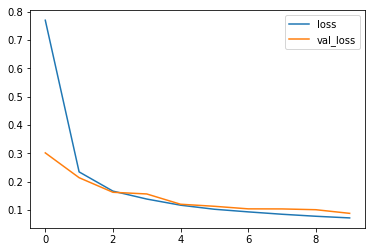

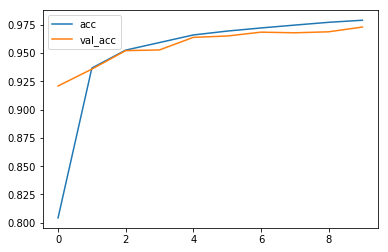

In [6]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()